# Библиотеки

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
import data_loader
import model_evaluation
import plotting_utils
import model_training

In [16]:
# run this function if you need to generate a csv data set from scratch
#data_loader.generate_csv_dataset()

In [2]:
# X, y, ID = data_loader.load_dataset()
X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_4096.csv', 
                                    y_path='data/y_labels_4096.csv',
                                    ID_path='data/IDs_4096.csv')

data loaded in 0.03486204147338867ms
          0         1         2         3         4         5         6  \
0  0.319181 -0.522682 -0.597526 -1.407693 -0.610477 -0.186076 -1.417255   
1 -0.502729 -0.332831  0.096766 -0.967017 -0.040431 -0.160043 -0.824728   
2 -0.906320  0.618802 -0.169045 -0.580832 -0.001135  1.000693 -0.013734   
3  0.897421 -1.357681 -0.065064 -1.938891 -0.333115 -0.361470 -1.352050   
4  0.493191 -1.505473 -0.693307 -1.629228 -0.459147 -0.437445 -1.302624   

          7         8         9  ...        70        71        72        73  \
0 -1.072452 -1.731274  0.549044  ...  0.161543  1.713000  0.981261  0.210663   
1 -0.501110 -0.918544  0.271237  ...  2.114454  1.614392  0.273066  0.401989   
2 -0.397151 -0.764400  0.588600  ...  1.191591  2.097101  2.183672  2.050057   
3 -0.770320 -1.951237 -0.027059  ... -0.269909 -0.522271  0.391216  0.328256   
4 -0.237175 -1.215223  0.284750  ... -0.938816  0.149529 -0.120720 -0.135068   

         74        75        76

In [ ]:
ID['0'].unique()    # actors

In [3]:
group_members= data_loader.get_k_fold_group_member()


X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X, y, ID, group_members)
print(len(X_k_folds))

5


In [4]:
# C = [0.01, 0.05, 0.1, 1.0, 10, 100]
# gamma = [100, 10, 1, 0.1, 0.01, 0.001]

C = np.logspace(-2, 1, 10, endpoint=True)
gamma = np.logspace(-3, 0.5, 10, endpoint=True)

UAR_list = []
UAR_best = 0
UAR_surf = np.zeros((len(C),len(gamma)))

for i in range(len(C)):
    for j in range(len(gamma)):
        model = SVC(kernel = 'rbf', C=C[i], gamma=gamma[j])
        UAR,y_pr,y_tr,y_te = model_training.estimate_model(model, X_k_folds, y_k_folds)
        UAR_surf[i,j] = UAR
        if UAR_best<UAR:
            UAR_best,y_pred,y_true,y_test = UAR,y_pr,y_tr,y_te
        UAR_list.append(UAR)       

100%|██████████| 5/5 [00:01<00:00,  4.08it/s]


UAR = 0.322


100%|██████████| 5/5 [00:01<00:00,  4.16it/s]


UAR = 0.333


100%|██████████| 5/5 [00:01<00:00,  4.20it/s]


UAR = 0.354


100%|██████████| 5/5 [00:01<00:00,  4.17it/s]


UAR = 0.351


100%|██████████| 5/5 [00:01<00:00,  4.09it/s]


UAR = 0.281


100%|██████████| 5/5 [00:01<00:00,  4.05it/s]


UAR = 0.130


100%|██████████| 5/5 [00:01<00:00,  3.97it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.65it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.92it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.71it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  4.21it/s]


UAR = 0.322


100%|██████████| 5/5 [00:01<00:00,  4.16it/s]


UAR = 0.333


100%|██████████| 5/5 [00:01<00:00,  4.08it/s]


UAR = 0.354


100%|██████████| 5/5 [00:01<00:00,  4.23it/s]


UAR = 0.351


100%|██████████| 5/5 [00:01<00:00,  4.01it/s]


UAR = 0.281


100%|██████████| 5/5 [00:01<00:00,  4.06it/s]


UAR = 0.130


100%|██████████| 5/5 [00:01<00:00,  4.12it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.78it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.90it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.30it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  2.89it/s]


UAR = 0.322


100%|██████████| 5/5 [00:01<00:00,  2.72it/s]


UAR = 0.333


100%|██████████| 5/5 [00:01<00:00,  3.55it/s]


UAR = 0.351


100%|██████████| 5/5 [00:01<00:00,  3.64it/s]


UAR = 0.351


100%|██████████| 5/5 [00:01<00:00,  3.82it/s]


UAR = 0.281


100%|██████████| 5/5 [00:01<00:00,  3.75it/s]


UAR = 0.130


100%|██████████| 5/5 [00:01<00:00,  3.63it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.40it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.80it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.71it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  4.20it/s]


UAR = 0.323


100%|██████████| 5/5 [00:01<00:00,  4.25it/s]


UAR = 0.338


100%|██████████| 5/5 [00:01<00:00,  4.41it/s]


UAR = 0.368


100%|██████████| 5/5 [00:01<00:00,  4.28it/s]


UAR = 0.365


100%|██████████| 5/5 [00:01<00:00,  4.02it/s]


UAR = 0.281


100%|██████████| 5/5 [00:01<00:00,  4.11it/s]


UAR = 0.130


100%|██████████| 5/5 [00:01<00:00,  4.12it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.74it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.92it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.79it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  4.34it/s]


UAR = 0.329


100%|██████████| 5/5 [00:01<00:00,  4.57it/s]


UAR = 0.367


100%|██████████| 5/5 [00:01<00:00,  4.78it/s]


UAR = 0.390


100%|██████████| 5/5 [00:01<00:00,  4.59it/s]


UAR = 0.382


100%|██████████| 5/5 [00:01<00:00,  4.17it/s]


UAR = 0.300


100%|██████████| 5/5 [00:01<00:00,  4.20it/s]


UAR = 0.130


100%|██████████| 5/5 [00:01<00:00,  4.12it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.61it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.93it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.76it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  4.65it/s]


UAR = 0.362


100%|██████████| 5/5 [00:01<00:00,  4.85it/s]


UAR = 0.390


100%|██████████| 5/5 [00:00<00:00,  5.23it/s]


UAR = 0.407


100%|██████████| 5/5 [00:01<00:00,  4.86it/s]


UAR = 0.406


100%|██████████| 5/5 [00:01<00:00,  4.12it/s]


UAR = 0.352


100%|██████████| 5/5 [00:01<00:00,  4.04it/s]


UAR = 0.130


100%|██████████| 5/5 [00:01<00:00,  3.79it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.60it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.95it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.89it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  4.97it/s]


UAR = 0.382


100%|██████████| 5/5 [00:00<00:00,  5.43it/s]


UAR = 0.417


100%|██████████| 5/5 [00:00<00:00,  5.63it/s]


UAR = 0.450


100%|██████████| 5/5 [00:00<00:00,  5.12it/s]


UAR = 0.431


100%|██████████| 5/5 [00:01<00:00,  3.95it/s]


UAR = 0.387


100%|██████████| 5/5 [00:01<00:00,  3.90it/s]


UAR = 0.245


100%|██████████| 5/5 [00:01<00:00,  4.02it/s]


UAR = 0.124


100%|██████████| 5/5 [00:01<00:00,  3.38it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.96it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.71it/s]


UAR = 0.125


100%|██████████| 5/5 [00:00<00:00,  5.43it/s]


UAR = 0.412


100%|██████████| 5/5 [00:00<00:00,  5.91it/s]


UAR = 0.448


100%|██████████| 5/5 [00:00<00:00,  5.96it/s]


UAR = 0.451


100%|██████████| 5/5 [00:01<00:00,  4.68it/s]


UAR = 0.456


100%|██████████| 5/5 [00:01<00:00,  3.83it/s]


UAR = 0.383


100%|██████████| 5/5 [00:01<00:00,  3.82it/s]


UAR = 0.245


100%|██████████| 5/5 [00:01<00:00,  3.76it/s]


UAR = 0.124


100%|██████████| 5/5 [00:01<00:00,  3.25it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.76it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.54it/s]


UAR = 0.125


100%|██████████| 5/5 [00:00<00:00,  5.26it/s]


UAR = 0.442


100%|██████████| 5/5 [00:00<00:00,  6.31it/s]


UAR = 0.456


100%|██████████| 5/5 [00:00<00:00,  5.98it/s]


UAR = 0.464


100%|██████████| 5/5 [00:01<00:00,  4.35it/s]


UAR = 0.452


100%|██████████| 5/5 [00:01<00:00,  3.87it/s]


UAR = 0.382


100%|██████████| 5/5 [00:01<00:00,  3.85it/s]


UAR = 0.245


100%|██████████| 5/5 [00:01<00:00,  3.54it/s]


UAR = 0.124


100%|██████████| 5/5 [00:01<00:00,  3.17it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.66it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.57it/s]


UAR = 0.125


100%|██████████| 5/5 [00:00<00:00,  6.16it/s]


UAR = 0.456


100%|██████████| 5/5 [00:00<00:00,  6.18it/s]


UAR = 0.462


100%|██████████| 5/5 [00:00<00:00,  5.11it/s]


UAR = 0.469


100%|██████████| 5/5 [00:01<00:00,  4.18it/s]


UAR = 0.441


100%|██████████| 5/5 [00:01<00:00,  3.82it/s]


UAR = 0.382


100%|██████████| 5/5 [00:01<00:00,  3.83it/s]


UAR = 0.245


100%|██████████| 5/5 [00:01<00:00,  3.82it/s]


UAR = 0.124


100%|██████████| 5/5 [00:01<00:00,  3.23it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.72it/s]


UAR = 0.125


100%|██████████| 5/5 [00:01<00:00,  3.65it/s]

UAR = 0.125


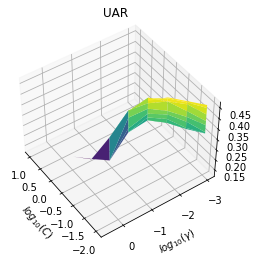

In [5]:
ax = plt.axes(projection='3d')
ax.plot_surface(np.log10(C), np.log10(gamma), UAR_surf, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('$log_{10}(C)$')
ax.set_ylabel('$log_{10}(\gamma)$')
ax.set_title('UAR')
ax.view_init(45, 145)

In [6]:
print(UAR_best)

0.46875


In [ ]:
plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred)

# SVM (version 2)

In [ ]:
C = [0.01, 0.05, 0.1, 1.0, 10, 100]
gamma = [100, 10, 1, 0.1, 0.01, 0.001]
UAR_list = []
UAR_best = 0
C_best, gamma_best = 0,0
for val_C in C:
    for val_gamma in gamma:
        model = SVC(kernel = 'rbf', C=val_C, gamma=val_gamma, decision_function_shape='ovr',break_ties=True)
        UAR,y_pr,y_tr,y_te = model_training.estimate_model(model, X_k_folds, y_k_folds)
        if UAR_best<UAR:
            UAR_best,y_pred,y_true,y_test = UAR,y_pr,y_tr,y_te
            C_best, gamma_best = val_C,val_gamma
            print(f'C = {val_C:.3f}, gamma = {val_gamma:.3f}')
        UAR_list.append(UAR)

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [ ]:
print(UAR_best)

## Results and confusion matrix

In [ ]:
plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred)